<a href="https://colab.research.google.com/github/joshimohitm9/Projects/blob/main/4_)_Customer_Segmentation_using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

In [2]:
data="https://raw.githubusercontent.com/kennedykwangari/Mall-Customer-Segmentation-Data/master/Mall_Customers.csv"

In [3]:
df=pd.read_csv(data)
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
106,107,Female,66,63,50
64,65,Male,63,48,51
108,109,Male,68,63,43
113,114,Male,19,64,46
83,84,Female,46,54,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

In [6]:
df['Age'].value_counts().sort_values(ascending=True)

Age
56     1
55     1
64     1
69     1
41     2
52     2
44     2
26     2
53     2
66     2
63     2
70     2
51     2
58     2
65     2
42     2
57     2
45     3
68     3
46     3
25     3
22     3
37     3
33     3
39     3
60     3
43     3
54     4
59     4
67     4
28     4
18     4
24     4
21     5
48     5
50     5
29     5
20     5
34     5
40     6
38     6
23     6
27     6
36     6
47     6
49     7
30     7
31     8
19     8
35     9
32    11
Name: count, dtype: int64

In [7]:
df["Annual Income (k$)"].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [8]:
np.average(df["Annual Income (k$)"])

60.56

In [9]:
df[df["Annual Income (k$)"]>=np.average(df["Annual Income (k$)"])].agg("count")

CustomerID                102
Gender                    102
Age                       102
Annual Income (k$)        102
Spending Score (1-100)    102
dtype: int64

In [10]:
df["Spending Score (1-100)"].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [11]:
x=df.iloc[:,3:].values

In [12]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

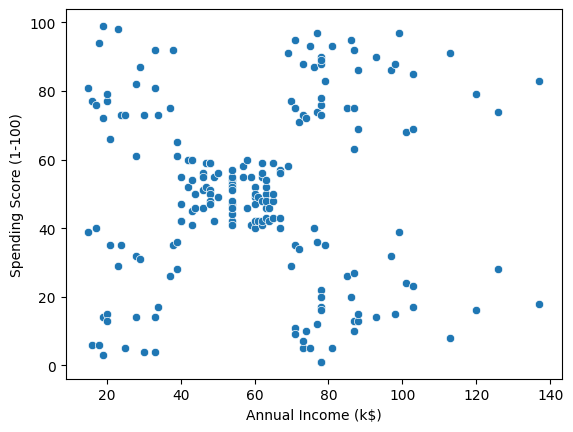

In [13]:
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"], data=df)
plt.show()


In [14]:
elbow=[]
for i in range(1,11):
  kmean=KMeans(n_clusters=i,random_state=9)
  kmean.fit(x)
  elbow.append(kmean.inertia_)


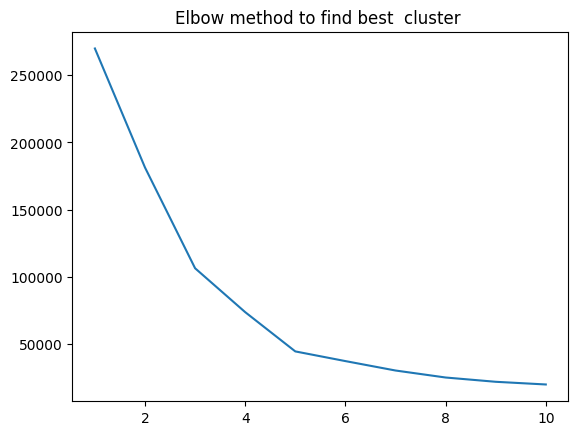

In [15]:
plt.plot(range(1,11),elbow)
plt.title("Elbow method to find best  cluster ")
plt.show()

In [16]:
model=KMeans(n_clusters=5,random_state=9)
model.fit(x)

KMeans(n_clusters=5, random_state=9)

In [17]:
y_pred=model.predict(x)
y_pred

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 0, 1, 0, 3, 0, 3, 0,
       1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 1, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0], dtype=int32)

In [18]:
category = []
for i in y_pred:
   if i==0:
    category.append("category 1")
   elif i==1:
    category.append("category 2")
   elif i==2:
    category.append("category 3")
   elif i==3:
    category.append("category 4")
   elif i==4:
    category.append("category 5")

In [19]:
category=pd.DataFrame(category,columns=["category"])
df_new=pd.concat([df,category],axis=1)

In [20]:
df_new

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),category
0,1,Male,19,15,39,category 5
1,2,Male,21,15,81,category 3
2,3,Female,20,16,6,category 5
3,4,Female,23,16,77,category 3
4,5,Female,31,17,40,category 5
...,...,...,...,...,...,...
195,196,Female,35,120,79,category 1
196,197,Female,45,126,28,category 4
197,198,Male,32,126,74,category 1
198,199,Male,32,137,18,category 4


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

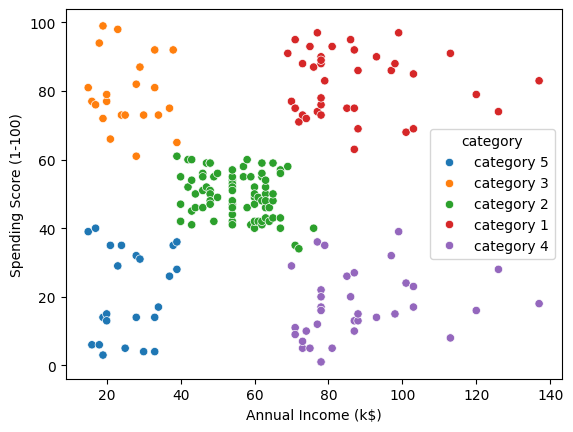

In [21]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"])

* category 1 ------> HIGH INCOME AND HIGH SPENDING SCORE
* category 2 -------> MEDIUM INCOME AND MEDIUM SPENDING SCORE
* category 3 ------> LOW INCOME AND HIGH SPENDING SCORE
* category 4 -------> HIGH INCOME AND LOW SPENDING SCORE
* category 5 -------> LOW INCOME AND LOW SPENDING SCORE

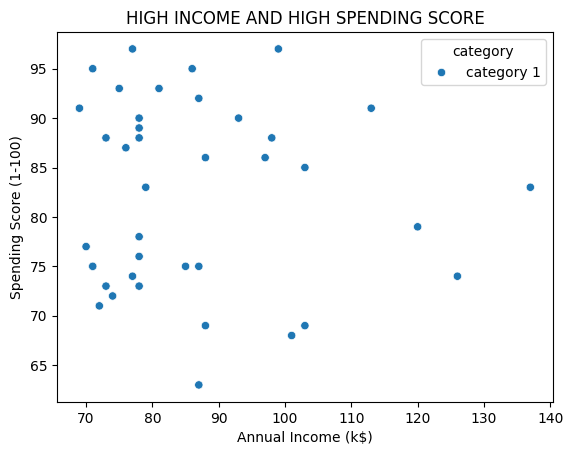

In [22]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"][df_new["category"]=="category 1"])
plt.title("HIGH INCOME AND HIGH SPENDING SCORE")
plt.show()

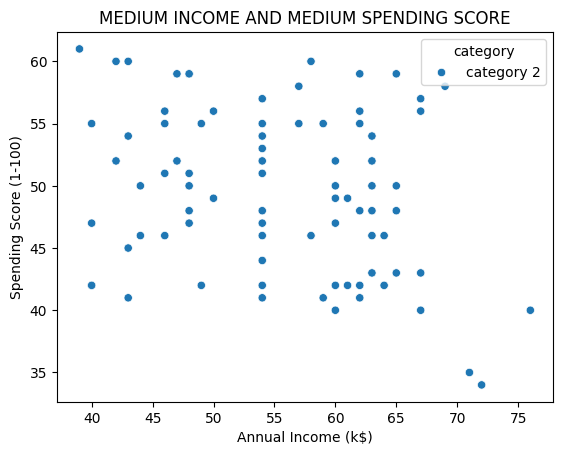

In [23]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"][df_new["category"]=="category 2"])
plt.title("MEDIUM INCOME AND MEDIUM SPENDING SCORE")
plt.show()

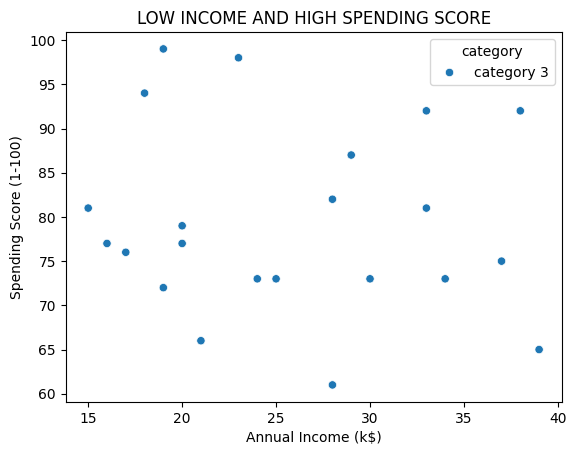

In [24]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"][df_new["category"]=="category 3"])
plt.title("LOW INCOME AND HIGH SPENDING SCORE")
plt.show()

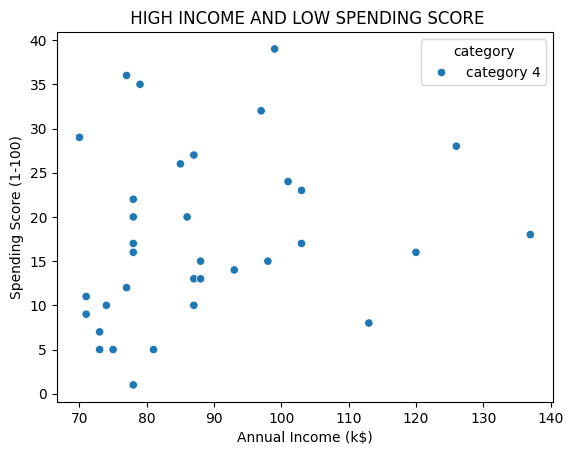

In [25]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"][df_new["category"]=="category 4"])
plt.title(" HIGH INCOME AND LOW SPENDING SCORE")
plt.show()

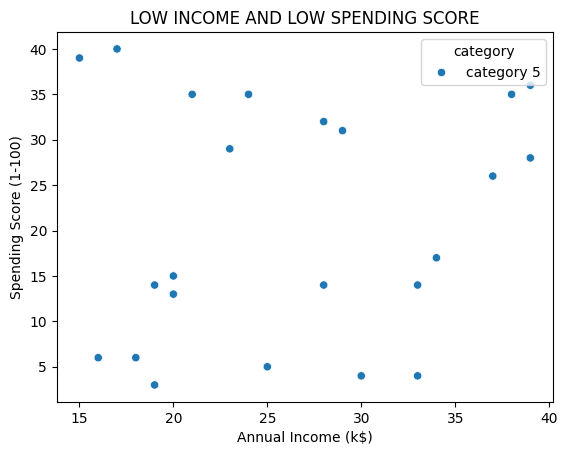

In [26]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df_new["category"][df_new["category"]=="category 5"])
plt.title("LOW INCOME AND LOW SPENDING SCORE")
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

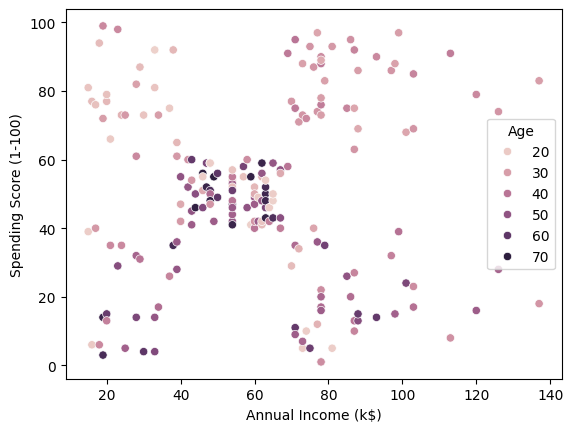

In [27]:
sns.scatterplot(x=df_new["Annual Income (k$)"],y=df_new["Spending Score (1-100)"],hue=df["Age"])

**so basically the age group btwn 20 to 40 are spending more and earning more**

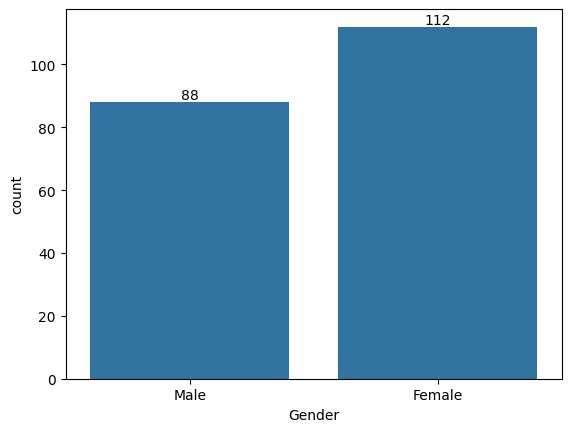

In [28]:
a=sns.countplot(x=df_new["Gender"])

a.bar_label(a.containers[0])
plt.show()

Females are shopping more

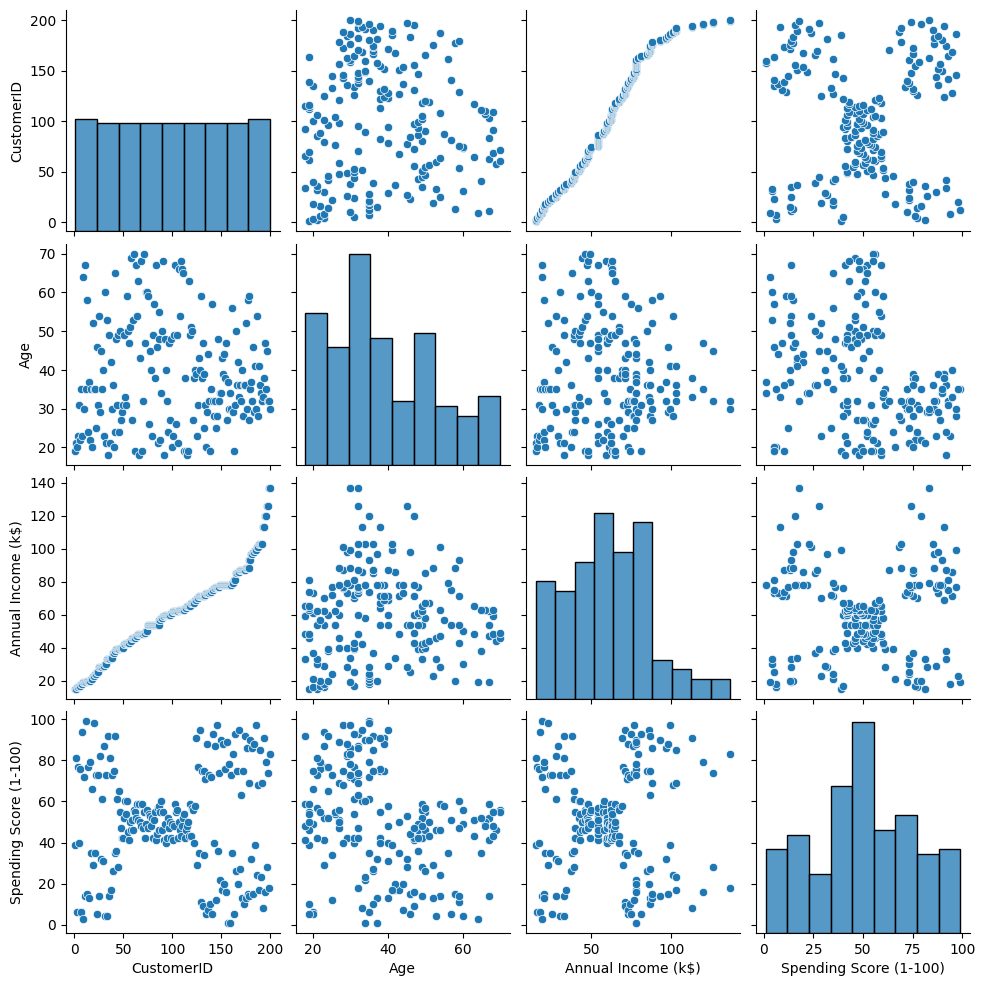

In [29]:
sns.pairplot(df)